(6000, 7)


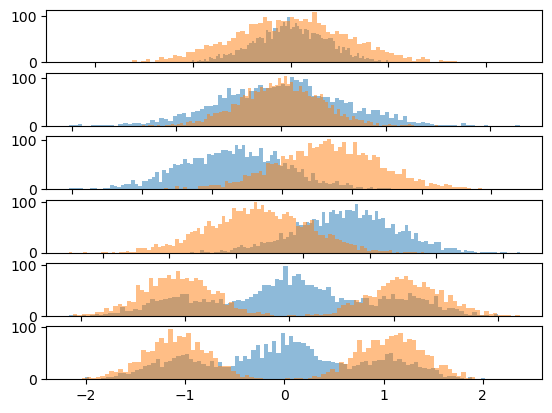

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn.datasets
from sklearn.metrics import classification_report

trainData = np.genfromtxt('./trainDataDigits.txt', delimiter=',')
print(trainData.shape)

D = np.array(trainData[:,0:trainData.shape[1]-1], dtype="float64").T
L = np.array(trainData[:,trainData.shape[1]-1], dtype="float64")

fix, axs = plt.subplots(6)
for i in range(0, 6):
    axs[i].hist(D[i, (L == 0)], bins=100, alpha=0.5)
    axs[i].hist(D[i, (L == 1)], bins=100, alpha=0.5)
plt.show()

By analyzing the first two features, we can see
- they both have a single peak
- They have the same mean
- The first feature has a larger variance than the second

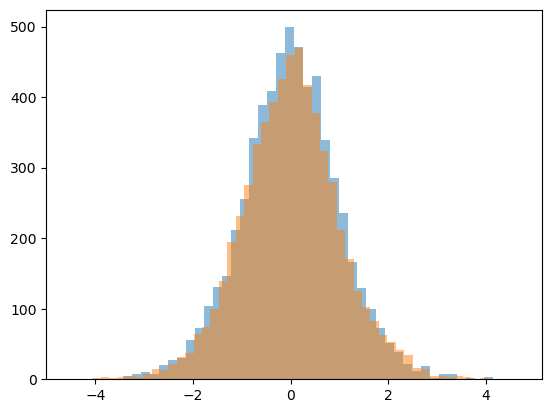

In [3]:

plt.hist(D[0, :], alpha=0.5, bins=50)
plt.hist(D[1, :], alpha=0.5, bins=50)

plt.show()

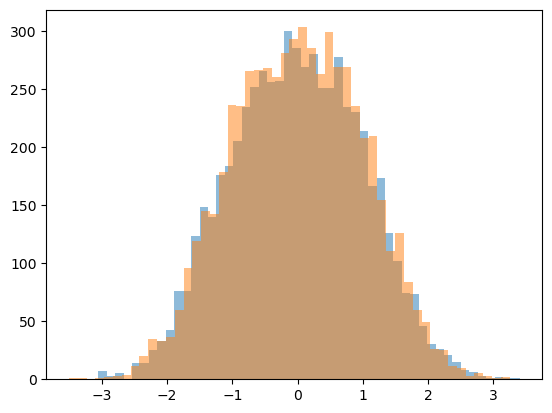

[1. 0. 1. ... 1. 0. 0.] (6000, 7) 1.092097037824535 0.569737796573968 0.6246239002651602 0.792964708610225


In [4]:

plt.hist(D[2, :], alpha=0.5, bins=50)
plt.hist(D[3, :], alpha=0.5, bins=50)

plt.show()
print(
    L,
    trainData.shape,
trainData[0, :].var(),
trainData[1, :].var(),
trainData[2, :].var(),
trainData[3, :].var()
)

(array([  2.,   5.,   9.,  14.,  34.,  53.,  74., 100., 165., 202., 212.,
        251., 267., 235., 201., 161., 136., 100., 104., 101., 127., 121.,
        137., 151., 169., 164., 137., 109.,  98., 106., 126., 147., 198.,
        202., 222., 263., 260., 219., 191., 152., 109.,  70.,  45.,  27.,
         13.,   4.,   3.,   2.,   1.,   1.]),
 array([-2.17273738, -2.08179199, -1.9908466 , -1.8999012 , -1.80895581,
        -1.71801041, -1.62706502, -1.53611962, -1.44517423, -1.35422883,
        -1.26328344, -1.17233805, -1.08139265, -0.99044726, -0.89950186,
        -0.80855647, -0.71761107, -0.62666568, -0.53572029, -0.44477489,
        -0.3538295 , -0.2628841 , -0.17193871, -0.08099331,  0.00995208,
         0.10089747,  0.19184287,  0.28278826,  0.37373366,  0.46467905,
         0.55562445,  0.64656984,  0.73751523,  0.82846063,  0.91940602,
         1.01035142,  1.10129681,  1.19224221,  1.2831876 ,  1.374133  ,
         1.46507839,  1.55602378,  1.64696918,  1.73791457,  1.82885997,
 

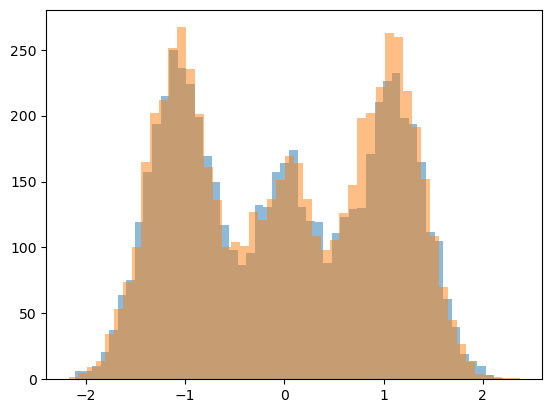

In [5]:

plt.hist(D[4, :], alpha=0.5, bins=50)
plt.hist(D[5, :], alpha=0.5, bins=50)


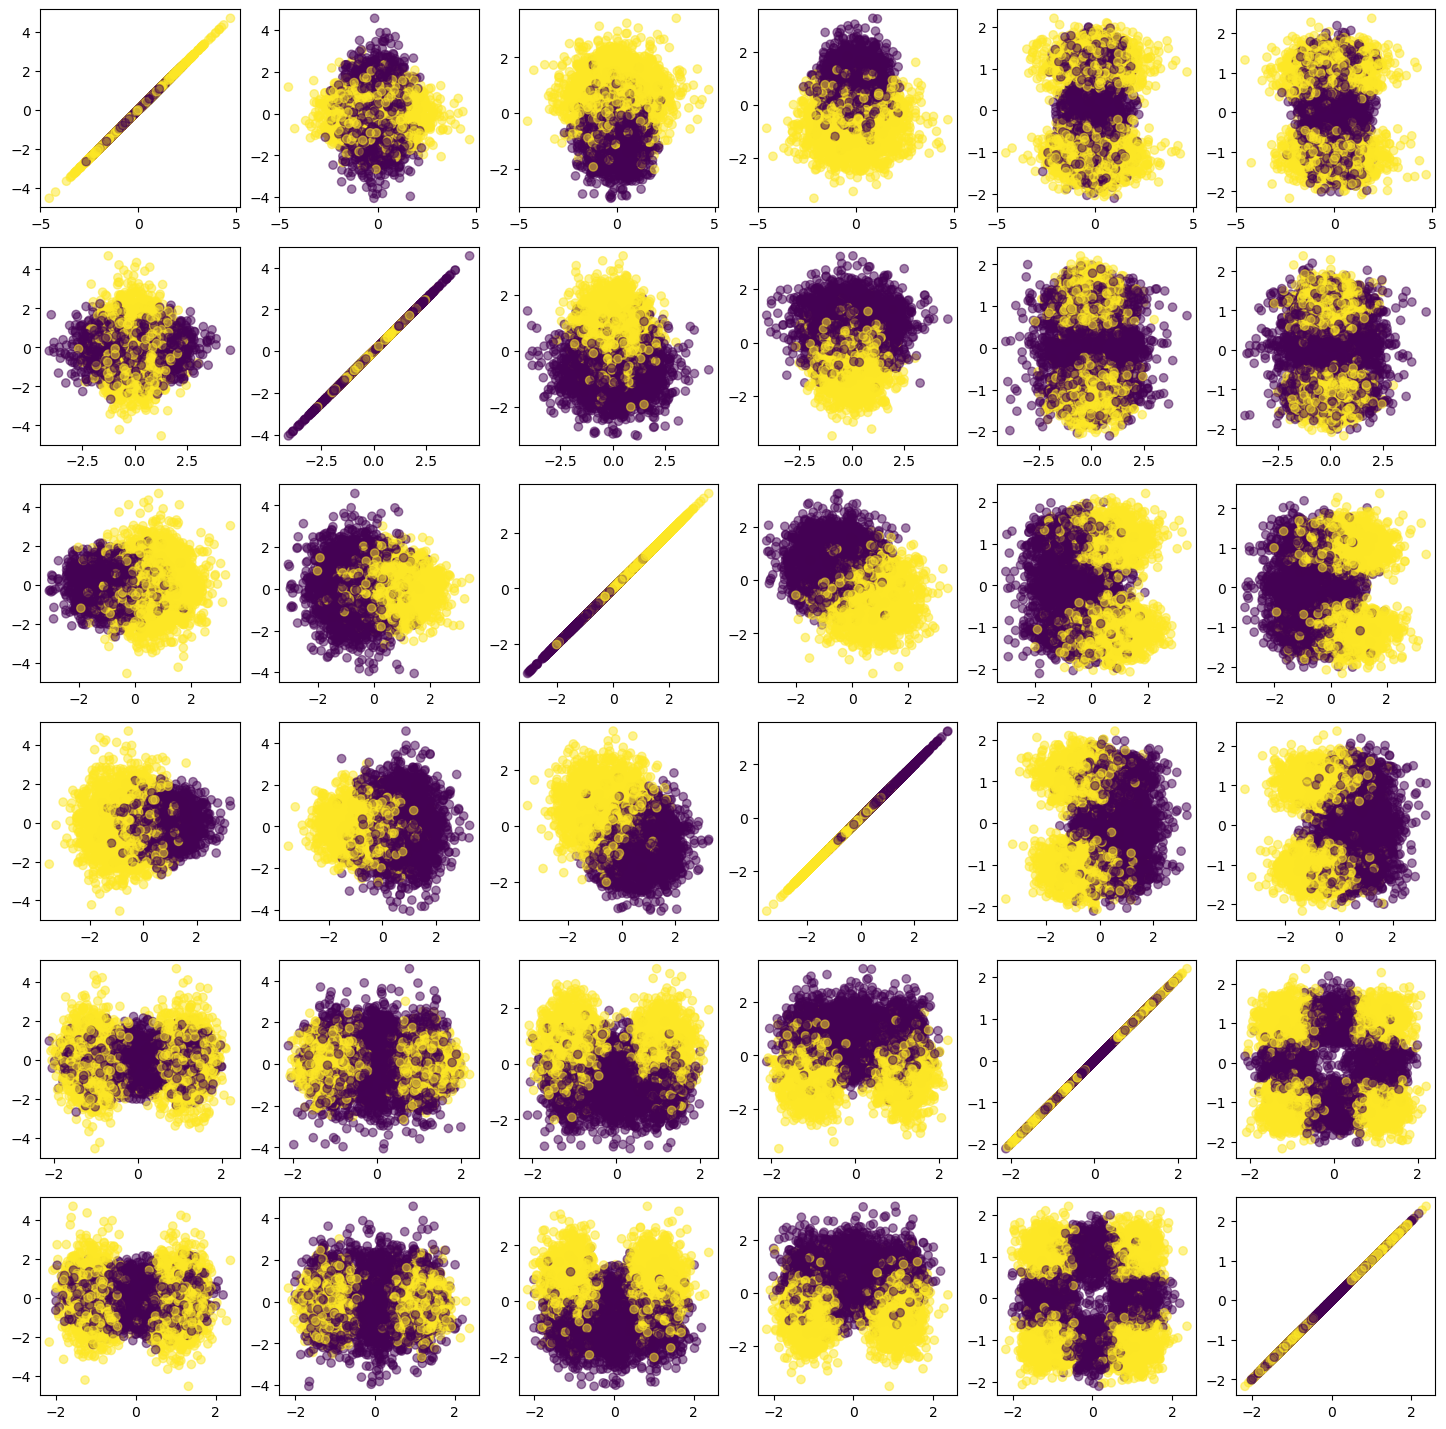

In [6]:
# plot classes
def scatter_classes(D, L):
    fig, axs = plt.subplots(6, 6)
    fig.set_size_inches(18, 18)
    for i in range(0, D.shape[0]):
        for j in range(0, D.shape[0]):
            axs[i,j].scatter(D[i], D[j], c=L, alpha=0.5)

scatter_classes(D, L)

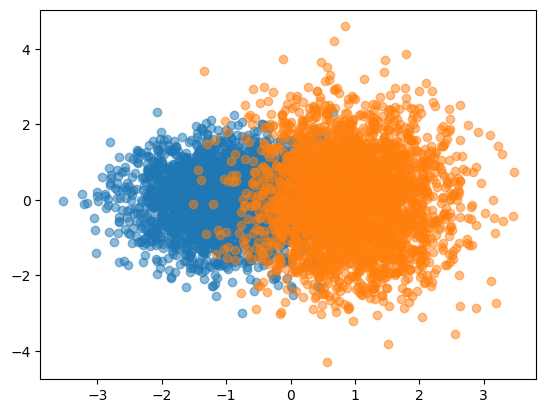

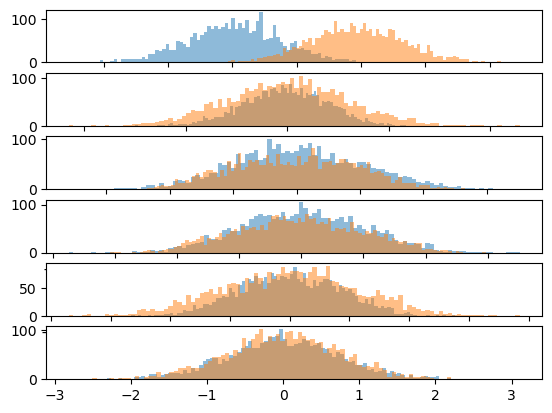

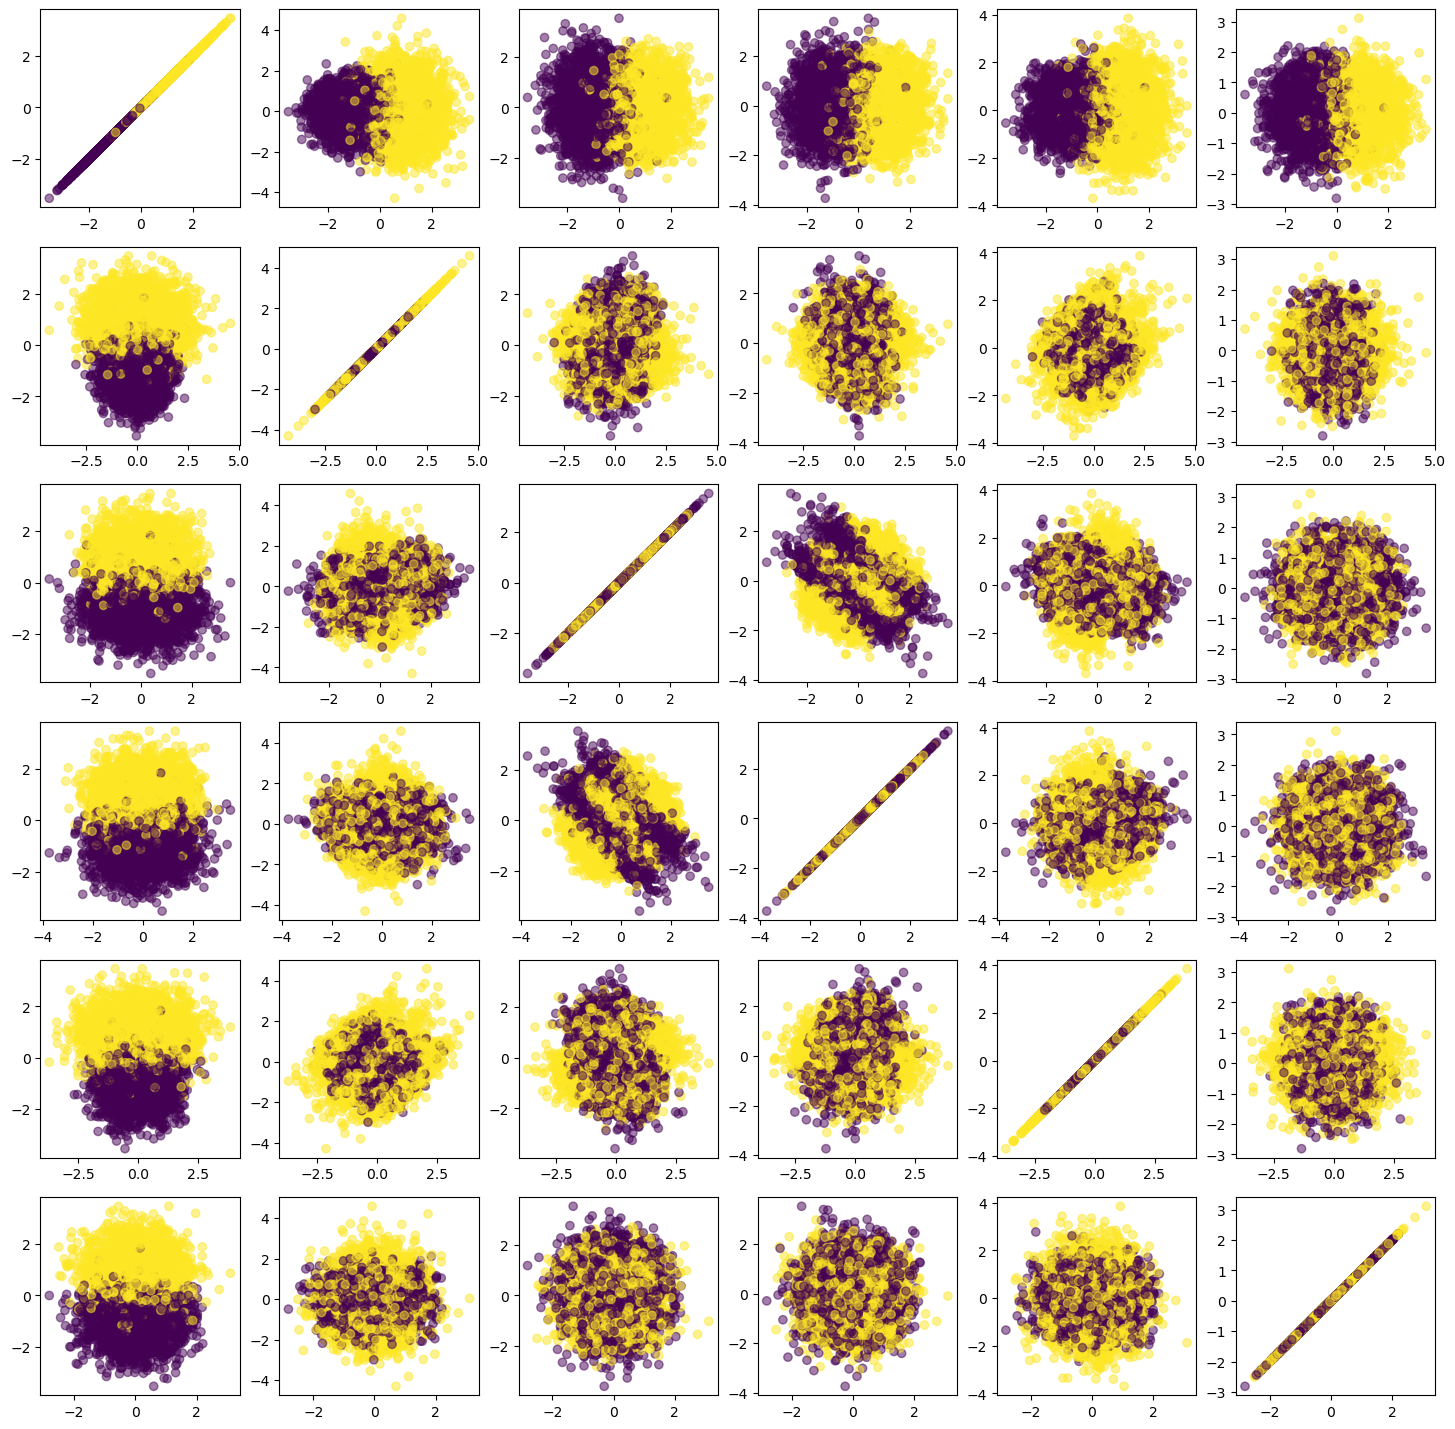

In [7]:
def calc_SB_SW(D, L):
    NL = np.unique(L)
    print(L)
    U = D.mean(1, keepdims=True)
    UC = []
    NC = []

    for l in np.unique(L):
        UC.append(D[:, (L == l)].mean(1))
        NC.append(np.count_nonzero(L == l))

    UC = np.array(UC).T

    SBsum = 0
    for i, l in enumerate(NL):
        SBsum += NC[i] * (UC[:, [i]] - U) @ (UC[:, [i]] - U).T

    SB = SBsum/D.shape[1]

    D_by_class = [D[:, (L == l)] for i, l in enumerate(NL)]
    SWsum = 0

    for i, l in enumerate(NL):
        SWsum += (D_by_class[i] - UC[:, [i]]) @ (D_by_class[i] - UC[:, [i]]).T

    SW = SWsum/D.shape[1]
    
    return (SB, SW)

def vcol(x):
    return x.reshape(-1, 1)
def vrow(x):
    return x.reshape(1, -1)
def compute_lda_JointDiag(D, L, m):

    Sb, Sw = calc_SB_SW(D, L)

    U, s, _ = np.linalg.svd(Sw)
    P = np.dot(U * vrow(1.0/(s**0.5)), U.T)

    Sb2 = np.dot(P, np.dot(Sb, P.T))
    U2, s2, _ = np.linalg.svd(Sb2)

    P2 = U2[:, 0:m]
    return np.dot(P2.T, P).T


def compute_PCA(D, m=2):
    u = D.mean(axis=1, keepdims=True)
    DC = D - u
    C = 1/D.shape[1]*DC@DC.T
    U, s, Vh = np.linalg.svd(C)
    P = U[:, 0:m]
    return P



def plot_hist_all_directions(D, n, rows, cols):
    fig, axs = plt.subplots(rows, cols)
    fig.suptitle('Histograms of all directions')
    for i in range(0, n):
        axs[i].hist(D[i, :], bins=30)
    plt.show()

P = compute_PCA(D, 6)
D_pca = P.T @ D

plt.figure()
plt.scatter(D_pca[0, (L == 0)], D_pca[1, (L == 0)], alpha=0.5)
plt.scatter(D_pca[0, (L == 1)], D_pca[1, (L == 1)], alpha=0.5)
plt.show()

fix, axs = plt.subplots(6)
for i in range(0, 6):
    axs[i].hist(D_pca[i, (L == 0)], bins=100, alpha=0.5)
    axs[i].hist(D_pca[i, (L == 1)], bins=100, alpha=0.5)
plt.show()
scatter_classes(D_pca, L)


[1. 0. 1. ... 1. 0. 0.]


(array([ 1.,  1.,  3.,  2.,  0.,  3.,  0.,  2.,  1.,  0.,  1.,  4.,  4.,
         3.,  5.,  5.,  6.,  7., 11., 12.,  9., 14., 12., 15., 18., 15.,
        23., 14., 29., 34., 44., 26., 42., 39., 50., 39., 60., 60., 62.,
        66., 58., 63., 76., 69., 73., 77., 72., 95., 77., 91., 79., 68.,
        83., 77., 76., 82., 70., 75., 77., 61., 64., 65., 66., 64., 53.,
        31., 40., 55., 39., 32., 32., 28., 18., 22., 27., 24.,  8., 12.,
        10., 13., 13.,  9.,  5.,  6.,  2.,  5.,  4.,  5.,  2.,  1.,  4.,
         1.,  1.,  3.,  2.,  0.,  0.,  1.,  0.,  2.]),
 array([-4.69063398, -4.62281082, -4.55498766, -4.48716449, -4.41934133,
        -4.35151817, -4.28369501, -4.21587185, -4.14804869, -4.08022553,
        -4.01240236, -3.9445792 , -3.87675604, -3.80893288, -3.74110972,
        -3.67328656, -3.6054634 , -3.53764023, -3.46981707, -3.40199391,
        -3.33417075, -3.26634759, -3.19852443, -3.13070127, -3.0628781 ,
        -2.99505494, -2.92723178, -2.85940862, -2.79158546, -2.723762

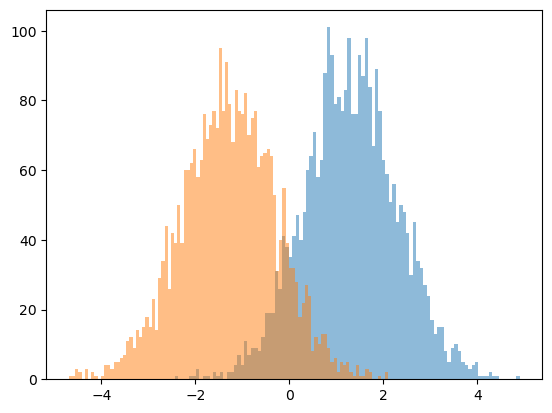

In [8]:

W = compute_lda_JointDiag(D_pca, L, 1)
D_lda = W.T @ D_pca
plt.hist(D_lda[0, (L == 0)], bins=100, alpha=0.5,)
plt.hist(D_lda[0, (L == 1)], bins=100, alpha=0.5,)


[1. 0. 0. ... 1. 0. 0.]
LDA
Labels:      [0. 0. 1. ... 0. 0. 0.]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 186 (out of 2000 samples)
Error rate: 9.3%


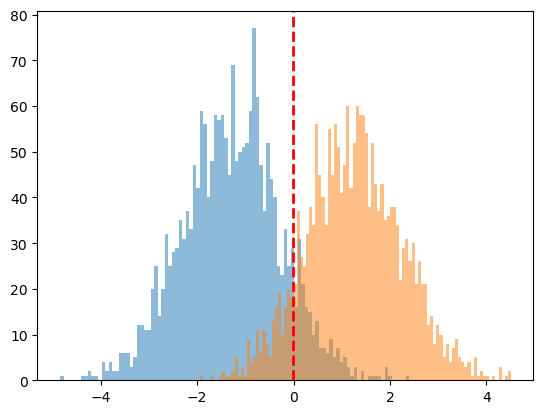

In [9]:

def apply_lda(U, D):
    return U.T @ D

def split_train(D, L, percentageTraining, seed=0):
    nTrain = int(D.shape[1] * percentageTraining)
    np.random.seed(seed)
    shuffledIndices = np.random.permutation(D.shape[1])

    DTR = D[:, shuffledIndices[0:nTrain]]
    LTR = L[shuffledIndices[0:nTrain]]

    DVAL = D[:, shuffledIndices[nTrain:]]
    LVAL = L[shuffledIndices[nTrain:]]

    return (DTR, LTR), (DVAL, LVAL)

(DTR, LTR), (DVAL, LVAL) = split_train(D, L, 2.0/3.0)
ULDA = compute_lda_JointDiag(DTR, LTR, 1)
DTR_lda = apply_lda(ULDA, DTR)
DVAL_lda = apply_lda(ULDA, DVAL)

if DTR_lda[0, LTR==0].mean() > DTR_lda[0, LTR==1].mean():
    ULDA = -ULDA
    DTR_lda = apply_lda(ULDA, DTR)
    DVAL_lda = apply_lda(ULDA, DVAL)


threshold = (DTR_lda[0, LTR==0].mean() + DTR_lda[0, LTR==1].mean()) / 2.0 #
threshold


plt.hist(DTR_lda[0, (LTR == 0)], bins=100, alpha=0.5,)
plt.hist(DTR_lda[0, (LTR == 1)], bins=100, alpha=0.5,)
plt.axvline(x=threshold, color='r', linestyle='dashed', linewidth=2)

PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
PVAL[DVAL_lda[0] >= threshold] = 1
PVAL[DVAL_lda[0] < threshold] = 0
print("LDA")
print('Labels:     ', LVAL)
print('Predictions:', PVAL)
print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
print('Error rate: %.1f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))


LDA
Labels:      [0. 0. 1. ... 0. 0. 0.]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 184 (out of 2000 samples)
Error rate: 9.2%


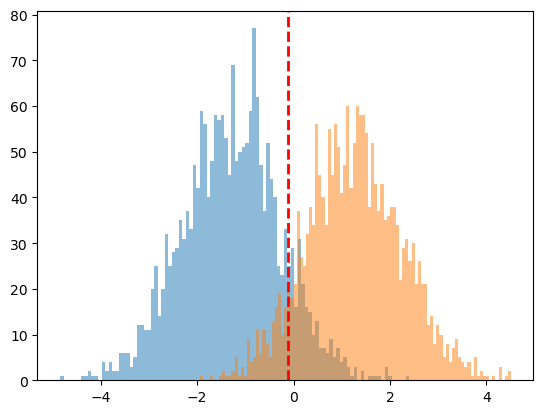

In [10]:
# changing a bit the threshold
threshold = (DTR_lda[0, LTR==0].mean() + DTR_lda[0, LTR==1].mean()) / 2.0 - 0.1


plt.hist(DTR_lda[0, (LTR == 0)], bins=100, alpha=0.5,)
plt.hist(DTR_lda[0, (LTR == 1)], bins=100, alpha=0.5,)
plt.axvline(x=threshold, color='r', linestyle='dashed', linewidth=2)

PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
PVAL[DVAL_lda[0] >= threshold] = 1
PVAL[DVAL_lda[0] < threshold] = 0
print("LDA")
print('Labels:     ', LVAL)
print('Predictions:', PVAL)
print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
print('Error rate: %.1f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))


In [11]:
# Grid search the parameters for the PCA
def grid_search(D, L):
    min_error = 10000
    min_error_m = 0
    for m in range(2, 6):
        P = compute_PCA(D, m)
        D_pca = P.T @ D

        (DTR, LTR), (DVAL, LVAL) = split_train(D_pca, L, 2.0/3.0)
        ULDA = compute_lda_JointDiag(DTR, LTR, 1)
        DTR_lda = apply_lda(ULDA, DTR)
        DVAL_lda = apply_lda(ULDA, DVAL)

        if DTR_lda[0, LTR==0].mean() > DTR_lda[0, LTR==1].mean():
            ULDA = -ULDA
            DTR_lda = apply_lda(ULDA, DTR)
            DVAL_lda = apply_lda(ULDA, DVAL)


        threshold = (DTR_lda[0, LTR==0].mean() + DTR_lda[0, LTR==1].mean()) / 2.0
        threshold

        PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
        PVAL[DVAL_lda[0] >= threshold] = 1
        PVAL[DVAL_lda[0] < threshold] = 0
        print("LDA")
        print('Labels:     ', LVAL)
        print('Predictions:', PVAL)
        print('Number of erros:', (PVAL != LVAL).sum(), '(out of %d samples)' % (LVAL.size))
        print('Error rate: %.1f%%' % ( (PVAL != LVAL).sum() / float(LVAL.size) *100 ))

        if (PVAL != LVAL).sum() < min_error:
            min_error = (PVAL != LVAL).sum()
            min_error_m = m
    print("Min error: ", min_error, "samples for m = ", min_error_m)
                
grid_search(D, L)

[1. 0. 0. ... 1. 0. 0.]
LDA
Labels:      [0. 0. 1. ... 0. 0. 0.]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 181 (out of 2000 samples)
Error rate: 9.0%
[1. 0. 0. ... 1. 0. 0.]
LDA
Labels:      [0. 0. 1. ... 0. 0. 0.]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 185 (out of 2000 samples)
Error rate: 9.2%
[1. 0. 0. ... 1. 0. 0.]
LDA
Labels:      [0. 0. 1. ... 0. 0. 0.]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 188 (out of 2000 samples)
Error rate: 9.4%
[1. 0. 0. ... 1. 0. 0.]
LDA
Labels:      [0. 0. 1. ... 0. 0. 0.]
Predictions: [0 0 1 ... 0 0 0]
Number of erros: 185 (out of 2000 samples)
Error rate: 9.2%
Min error:  181 samples for m =  2
